In [1]:
import yfinance as yf
import pandas as pd

stocks=["AAPL","GOOG","META","ORCL","TSM","TCEHY","MSFT","INTC","CSCO","IBM","ADBE","AVGO","AMZN","NVDA","TSLA","CRM","QCOM","BABA"]

raw=yf.download(stocks,start="2022-6-1", end="2023-7-11")

close=raw["Adj Close"]

[*********************100%***********************]  18 of 18 completed


In [2]:
daily_return=close/close.shift(1)-1

for i in stocks:
    change=close[i][-1]-close[i][0]
    print(f"the change of {i} is {change}")
    average=daily_return[i].mean()
    print(f"the daily return of {i} is {average}")

ma_30=close.rolling(window=30).mean()
ma_30

the change of AAPL is 40.78271484375
the daily return of AAPL is 0.001062623409936227
the change of GOOG is 2.733001708984375
the daily return of GOOG is 0.0003570007972970692
the change of META is 105.46000671386719
the daily return of META is 0.0022341823683807577
the change of ORCL is 43.86894226074219
the daily return of ORCL is 0.0019177933930353787
the change of TSM is 7.4440765380859375
the daily return of TSM is 0.0005573830774361801
the change of TCEHY is -0.3041725158691406
the daily return of TCEHY is 0.00042580399256203293
the change of MSFT is 62.01800537109375
the daily return of MSFT is 0.0009556495472381184
the change of INTC is -9.654903411865234
the daily return of INTC is -0.0006205247808669129
the change of CSCO is 7.995708465576172
the daily return of CSCO is 0.0007120208448064088
the change of IBM is 0.2866058349609375
the daily return of IBM is 8.81912474866173e-05
the change of ADBE is 78.19000244140625
the daily return of ADBE is 0.0009547304953133385
the chang

,AAPL,ADBE,AMZN,AVGO,BABA,CRM,CSCO,GOOG,IBM,INTC,META,MSFT,NVDA,ORCL,QCOM,TCEHY,TSLA,TSM
Date,,,,,,,,,,,,,,,,,,
2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03,181.938000,447.250999,124.152,807.854266,84.970999,211.683665,49.944598,123.339667,132.277666,32.119667,271.207000,331.764000,393.421316,111.785699,115.344692,42.714333,232.271000,100.343863
2023-07-05,182.477000,451.117999,124.623,813.961782,84.981666,211.798999,50.036256,123.319000,132.510333,32.205666,272.831333,332.424334,397.106727,112.221503,115.744694,42.714000,235.682333,100.637068
2023-07-06,183.064000,454.759333,125.068,819.735946,84.906333,211.794999,50.124837,123.154333,132.665666,32.262000,274.287000,333.094000,400.750135,112.675909,116.100230,42.636666,238.604667,100.906153


<Figure size 432x288 with 0 Axes>

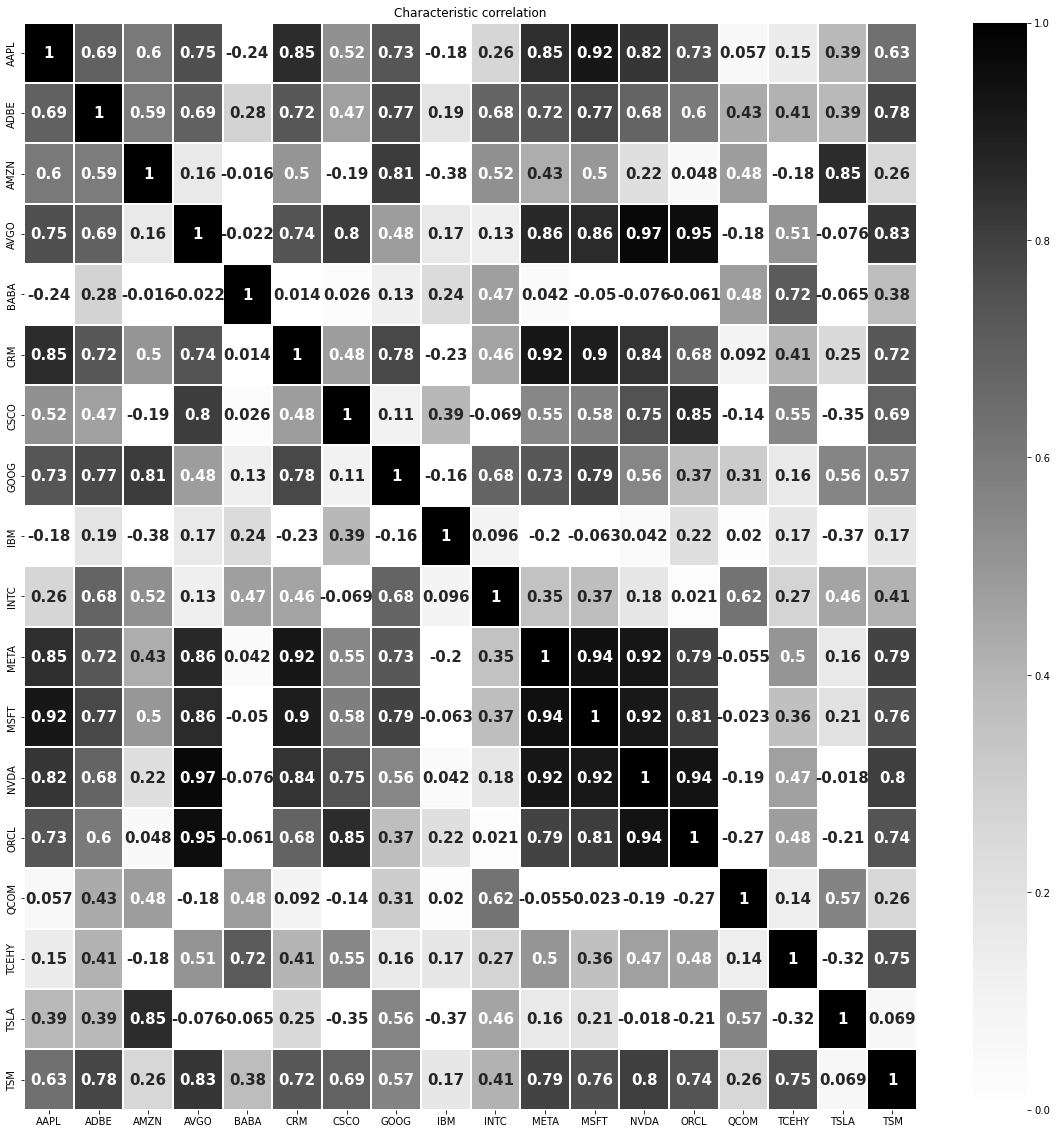

In [3]:
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
correlations = close.corr()
# print(correlations)
names=close.columns.to_list()
fig = plt.figure()
ax = plt.subplots(figsize=(20, 20))  # 图片大小为20*20
ax = sns.heatmap(correlations, cmap=plt.cm.Greys, linewidths=0.05, vmax=1, vmin=0, annot=True,
                 annot_kws={'size': 15, 'weight': 'bold'})
# 热力图参数设置（相关系数矩阵，颜色，每个值间隔等）
ticks = np.arange(0,18, 1)  # 生成0-17，步长为1
plt.xticks(np.arange(18), names)  # 横坐标标注点
plt.yticks(np.arange(18), names)  # 纵坐标标注点
ax.set_xticks(ticks + 0.5)  # 生成刻度
ax.set_yticks(ticks + 0.5)
ax.set_xticklabels(names)  # 生成x轴标签
ax.set_yticklabels(names)
ax.set_title('Characteristic correlation')  # 标题设置

# plt.savefig(factor + '_MA5.png', dpi=600)
plt.show()

In [4]:
import torch
import torch.nn as nn
class RegLSTM(nn.Module):
    def __init__(self, inp_dim, out_dim, mid_dim, mid_layers):
        super(RegLSTM, self).__init__()

        self.rnn = nn.LSTM(inp_dim, mid_dim, mid_layers)  # rnn
        self.reg = nn.Sequential(
            nn.Linear(mid_dim, mid_dim),
            nn.Tanh(),
            nn.Linear(mid_dim, out_dim),
        )  # regression

    def forward(self, x):
        y = self.rnn(x)[0]  # y, (h, c) = self.rnn(x)     
        seq_len, batch_size, hid_dim = y.shape
        y = y.view(-1, hid_dim)                           
        y = self.reg(y)                                   
        y = y.view(seq_len, batch_size, -1)               
        return y

    """
    PyCharm Crtl+click nn.LSTM() jump to code of PyTorch:
    Examples::
        >>> rnn = nn.LSTM(10, 20, 2)
        >>> input = torch.randn(5, 3, 10)     # 5个时间步，也就是每个时间序列的长度是5,3表示一共有3个时间序列，10表示每个序列在每个时间步的维度是10
        >>> h0 = torch.randn(2, 3, 20)
        >>> c0 = torch.randn(2, 3, 20)
        >>> output, (hn, cn) = rnn(input, (h0, c0))
    """

    def output_y_hc(self, x, hc):

        y, hc = self.rnn(x, hc)  # y, (h, c) = self.rnn(x)

        seq_len, batch_size, hid_dim = y.size()
        y = y.view(-1, hid_dim)
        y = self.reg(y)
        y = y.view(seq_len, batch_size, -1)
        return y, hc


In [22]:
#make data_set
AAPL=np.array(close["AAPL"])

#data pre_clean
def minmaxscaler(x):
    minx = np.amin(x)
    maxx = np.amax(x)
    return (x - minx)/(maxx - minx), (minx, maxx)

def preminmaxscaler(x, minx, maxx):
    return (x - minx)/(maxx - minx)

def unminmaxscaler(x, minx, maxx):
    return x * (maxx - minx) + minx

bchain = AAPL[:, np.newaxis]
inp_dim = 1
out_dim = 1
mid_dim = 30
mid_layers = 2
data_x = bchain[:-1, :]
data_y = bchain[+1:, :]
# data_x shape：(277, 1)
# data_y shape：(277, 1)

train_size = 240
train_x = data_x[:train_size, :]
train_y = data_y[:train_size, :]
# train_x shape: (113, 1)
# train_y shape: (113, 1)

# 预处理数据  归一化
train_x, train_x_minmax = minmaxscaler(train_x)
train_y, train_y_minmax = minmaxscaler(train_y)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 第一种操作，直接把batch_x batch_y这一个序列扔进去
batch_x = train_x[:, np.newaxis, :]
batch_y = train_y[:, np.newaxis, :]
batch_x = torch.tensor(batch_x, dtype=torch.float32, device=device)
batch_y = torch.tensor(batch_y, dtype=torch.float32, device=device)

# torch.cuda.is_available()


In [27]:
## training

# 加载模型
model = RegLSTM(inp_dim, out_dim, mid_dim, mid_layers).to(device)
loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# 开始训练
print("Training......")
for e in range(100):
    out = model(batch_x)

    Loss = loss(out, batch_y)

    optimizer.zero_grad()
    Loss.backward()
    optimizer.step()

    if e % 10 == 0:
        print('Epoch: {:4}, Loss: {:.5f}'.format(e, Loss.item()))
torch.save(model.state_dict(), './net.pth')
print("Save in:", './net.pth')


Training......
Epoch:    0, Loss: 0.13647
Epoch:   10, Loss: 0.05066
Epoch:   20, Loss: 0.01549
Epoch:   30, Loss: 0.00852
Epoch:   40, Loss: 0.00568
Epoch:   50, Loss: 0.00509
Epoch:   60, Loss: 0.00472
Epoch:   70, Loss: 0.00437
Epoch:   80, Loss: 0.00413
Epoch:   90, Loss: 0.00390
Save in: ./net.pth


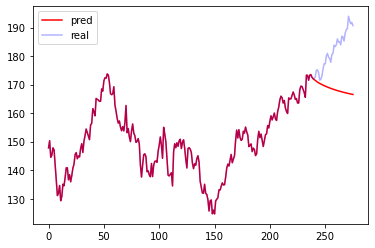

In [28]:
new_data_x = data_x.copy()
new_data_x[train_size:] = 0

test_len = 40

eval_size = 1
zero_ten = torch.zeros((mid_layers, eval_size, mid_dim), dtype=torch.float32, device=device)

for i in range(train_size, len(new_data_x)):  # 要预测的是i
    test_x = new_data_x[i-test_len:i, np.newaxis, :]
    test_x = preminmaxscaler(test_x, train_x_minmax[0], train_x_minmax[1])
    batch_test_x = torch.tensor(test_x, dtype=torch.float32, device=device)

    if i == train_size:
        test_y, hc = model.output_y_hc(batch_test_x, (zero_ten, zero_ten))
    else:
        test_y, hc = model.output_y_hc(batch_test_x[-2:], hc)
    test_y = model(batch_test_x)
    predict_y = test_y[-1].item()
    predict_y = unminmaxscaler(predict_y, train_x_minmax[0], train_y_minmax[1])
    new_data_x[i] = predict_y

plt.plot(new_data_x, 'r', label='pred')
plt.plot(data_x, 'b', label='real', alpha=0.3)
plt.legend(loc='best')

